# RSE Group Leaders Survey 2023

In [1]:
# import the necessary packages
import sys
import pandas as pd

# set the path to the source directory
sys.path.append('../src/')
import read_write as rw
import preprocess as pp
import process as pr
import visualisations as vis

# set to True to print details of the processing
verbose = True

# some column of interest
col_ngroup = "q9"
col_institution = "q3"

# settings for the processing and visualisations
qsts_not_overview = ["q1", "q2", "q3", "q17", "q18", "q19", "q20"]
min_gsize = 5  # minimum group size for percentage calculations

print(f"Verbose processing: {verbose}")

Verbose processing: True


In [2]:
setup, dset = rw.read_setup_and_data(verbose=verbose)
dset_gnames = rw.read_group_names('group_names', verbose=verbose)
validated = rw.validate_setup_and_data(setup, dset)
dset = pp.rename_groups(dset, dset_gnames)

if not validated:
    print("ERROR: setup and data files are not valid.")
    raise KeyboardInterrupt

# number of respondents and questions
nrsps_raw = dset.shape[0]
nqsts = dset.shape[1]

# replace dset columns with setup keys
dset.columns = setup.keys()

# remove respondents who did not agree to share data
dset = dset[dset.q1 == "Yes"]
nrsps = dset.shape[0]

# process the text and checkbox responses
dset = pp.preprocess_text(dset, setup, verbose=verbose)
dset = pp.preprocess_checkboxes(dset, setup, verbose=verbose)

# save the processed dataset
rw.save_dataset(dset, verbose=verbose)

# print out some information
print()
print(f"Questions  : {nqsts}")
print(f"Respondents - all           : {nrsps_raw}")
print(f"Respondents - agreed sharing: {nrsps}")

Read survey responses from ../data/raw/survey_responses.csv
Read survey setup from ../data/raw/survey_setup.json
Read group names from ../data/raw/group_names.csv

Preprocessing text responses to
- fill empty cells with ''
- replace new line characters with spaces

Preprocessing checkbox responses to
- fill empty cells with ''
- replace ( with - and ) with ''
- create extra columns for each option, including Other if it exists
Saved processed survey responses to ../data/processed/survey_responses_processed.csv

Questions  : 20
Respondents - all           : 36
Respondents - agreed sharing: 36


## Overview of the answers


Q4: Is your group
Saved processed survey responses to ../data/processed/q4_stats.csv


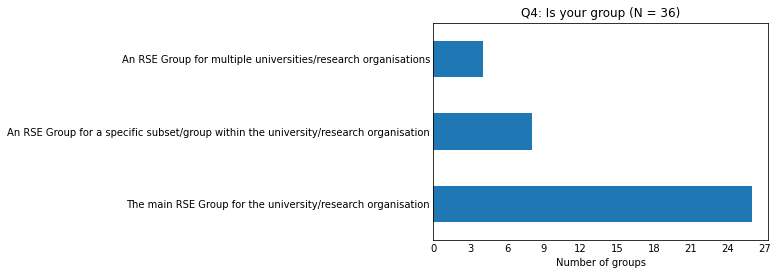


Q5: What is your position in the RSE Group?
                                                                             count
Head of RSE                                                                      7
Director                                                                         3
Head of Research Software Engineering                                            3
Research Software Engineer                                                       3
Team Lead                                                                        1
I am the academic director of the facility in which the RSE group is hosted      1
Principal Architect (i.e. Senior RSE)                                            1
Sole Member / Lead                                                               1
Group Leader                                                                     1
RSE team leader                                                                  1
Manage the Research It Team               

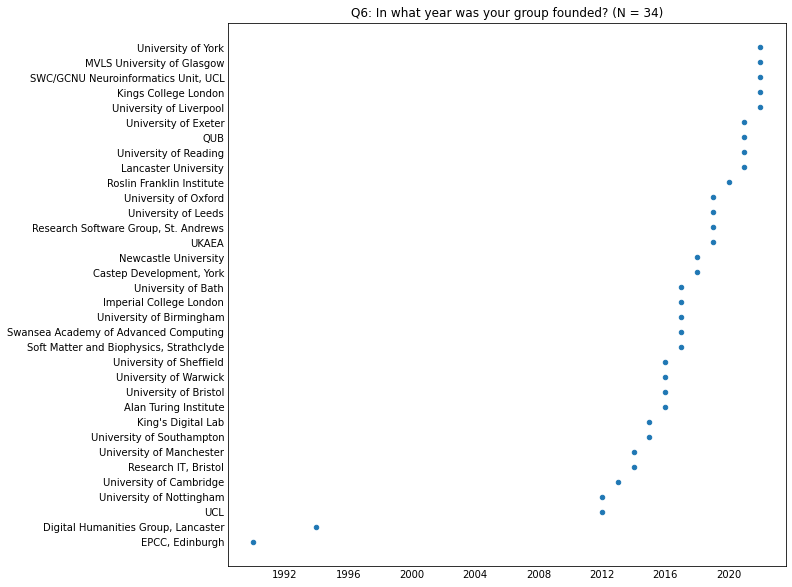

Saved processed survey responses to ../data/processed/q6_scatter.csv

Q7: Where is your group based?
Saved processed survey responses to ../data/processed/q7_stats.csv


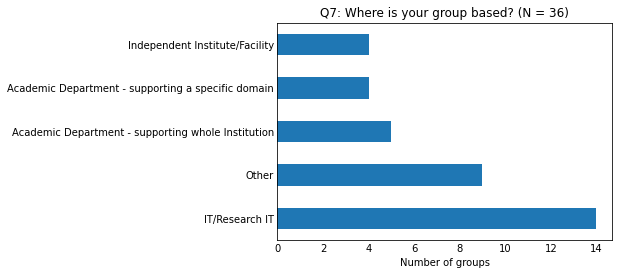


Q8: How many people were in your group when it started?


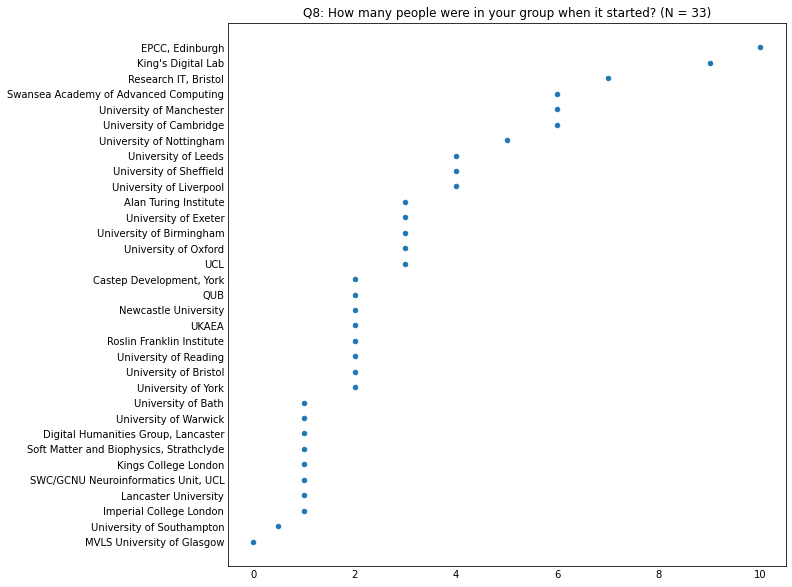

Saved processed survey responses to ../data/processed/q8_scatter.csv

Q9: How many people are currently in your group in total?


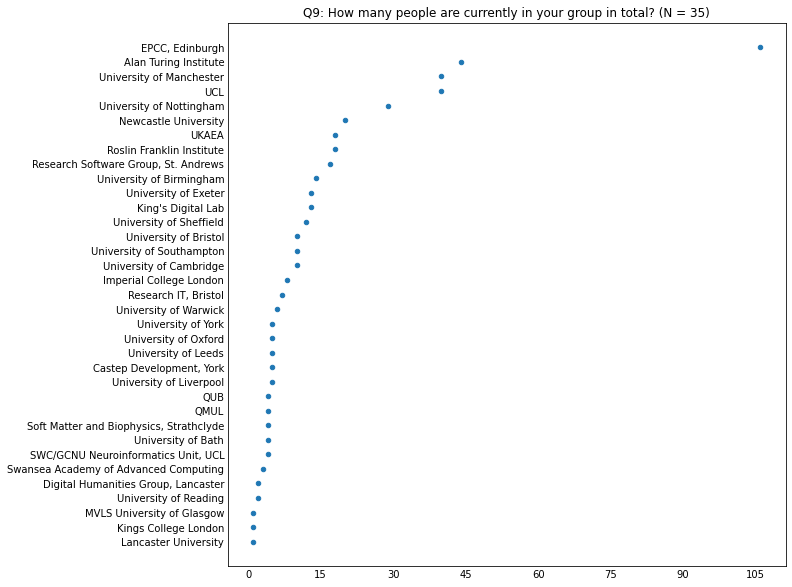

Saved processed survey responses to ../data/processed/q9_scatter.csv

Q10: How many people in your group are in a more senior role than a standard RSE (i.e. typically receiving greater pay than a postdoctoral researcher)?


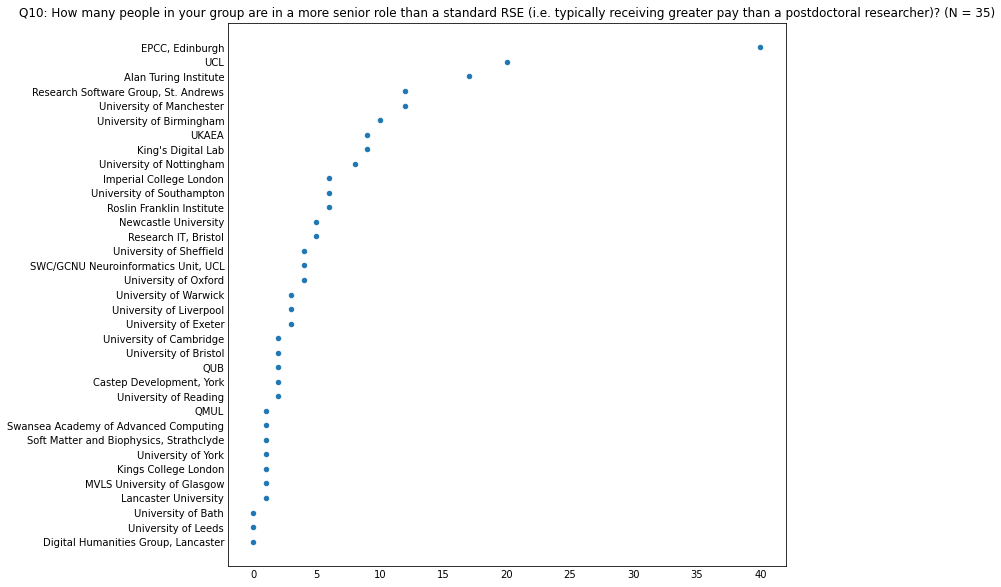

Saved processed survey responses to ../data/processed/q10_scatter.csv

Q11: How many people in your group are in a less senior role than a standard RSE (e.g. a junior RSE)?


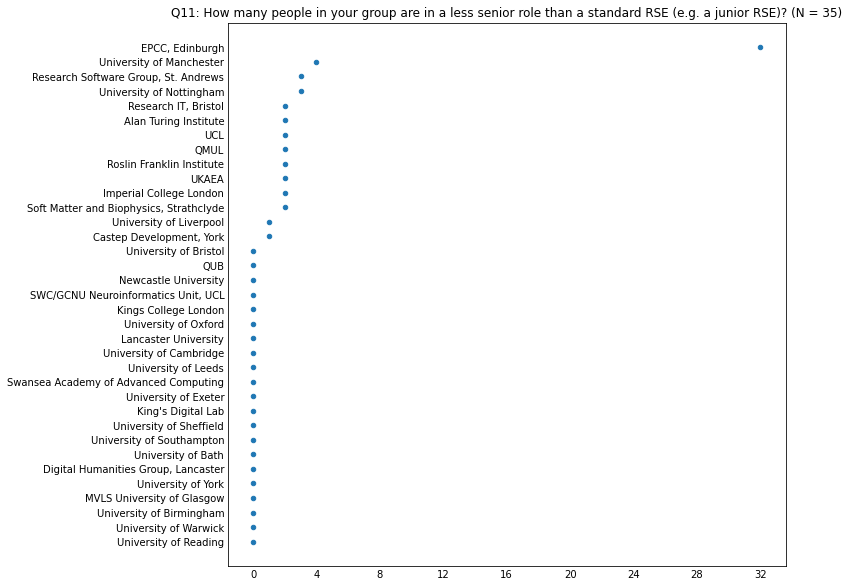

Saved processed survey responses to ../data/processed/q11_scatter.csv

Q12: How many staff have left your group in the last two years?


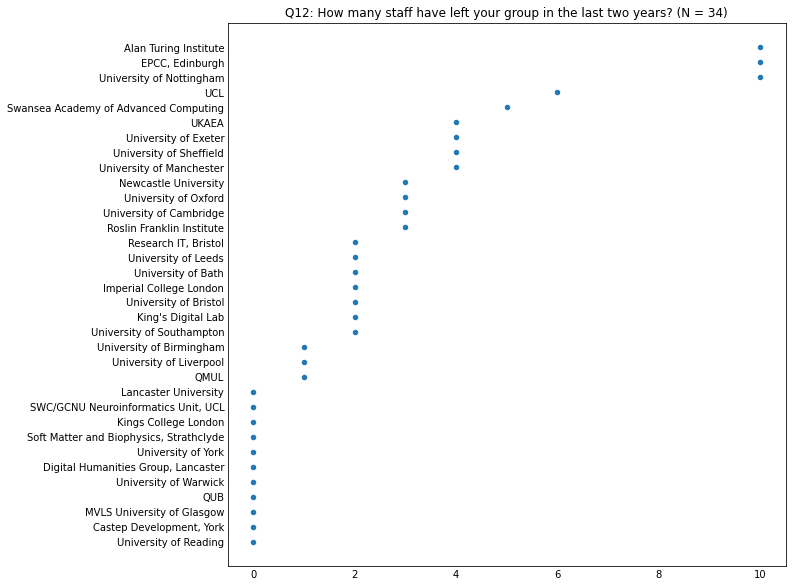

Saved processed survey responses to ../data/processed/q12_scatter.csv

Q13: Where did those staff go?


| What is the name of your group?         | Where did those staff go?                                                                                                                                                                                                                                                                                               |
|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Imperial College London                 | 1: industry, 1: an embedded RSE team within Imperial (after a break)                                                                                                                                                                                                                                                    |
| Newcastle University                    | One to industry, two to other institutions                                                                                                                                                                                                                                                                              |
| SWC/GCNU Neuroinformatics Unit, UCL     |                                                                                                                                                                                                                                                                                                                         |
| Kings College London                    |                                                                                                                                                                                                                                                                                                                         |
| University of Oxford                    | 1) Senior Lecturer position 2) position in industry 3) promotion to Senior RSE (+permanent)                                                                                                                                                                                                                             |
| Alan Turing Institute                   | 1 internal move to domain-focussed data science team at Turing. 2 to MSc/PhD. 2 to academic PDRA/Lecturer. 5 to RSE/Data Science roles in industry. One academic and one industry moves were to more senior roles, the rest of them were lateral moves (including 2 shortly after promotion to Senior within the team). |
| University of Cambridge                 | research in Europe (2x), industry (1x)                                                                                                                                                                                                                                                                                  |
| University of Leeds                     | One became a teaching fellow in the School of Computing, the other moved to industry                                                                                                                                                                                                                                    |
| UCL                                     | 1 postdoc, 3 industry (1 SE, 1 training, 1 RSE-like), 1 research institute, 1 uni spin-out; 3 moved country                                                                                                                                                                                                             |
| Research Software Group, St. Andrews    |                                                                                                                                                                                                                                                                                                                         |
| QUB                                     |                                                                                                                                                                                                                                                                                                                         |
| University of Exeter                    | 3 left to industry, 1 transferred to a sys admin role in the university                                                                                                                                                                                                                                                 |
| University of Sheffield                 | Industry x 2, Other groups/roles x2                                                                                                                                                                                                                                                                                     |
| QMUL                                    |                                                                                                                                                                                                                                                                                                                         |
| University of Bath                      | Industry (2)                                                                                                                                                                                                                                                                                                            |
| Castep Development, York                |                                                                                                                                                                                                                                                                                                                         |
| Roslin Franklin Institute               | One left for industry + pay rise + more convenient commute One left as they did not complete probation One left for a similar level RSE role with similar pay in an area of the country they preferred.                                                                                                                 |
| University of Reading                   |                                                                                                                                                                                                                                                                                                                         |
| UKAEA                                   | Position in industry: 2 Different research position at another institution: 1 Different internal research position: 1                                                                                                                                                                                                   |
| University of Nottingham                | 6 to industry, 1 to NHS, 1 to further study, 1 transferred to Central IT team, 1 unknown                                                                                                                                                                                                                                |
| University of Birmingham                | Position in industry                                                                                                                                                                                                                                                                                                    |
| University of Warwick                   |                                                                                                                                                                                                                                                                                                                         |
| University of Manchester                | 1x internal move, 1x another University, 2x industry                                                                                                                                                                                                                                                                    |
| University of Bristol                   | One left to become Head of RSE at another University. Another left for a good position in industry.                                                                                                                                                                                                                     |
| King's Digital Lab                      | One did not go to new position; one went to position in industry                                                                                                                                                                                                                                                        |
| MVLS University of Glasgow              |                                                                                                                                                                                                                                                                                                                         |
| The Open University                     |                                                                                                                                                                                                                                                                                                                         |
| University of York                      |                                                                                                                                                                                                                                                                                                                         |
| Digital Humanities Group, Lancaster     |                                                                                                                                                                                                                                                                                                                         |
| University of Liverpool                 | retire                                                                                                                                                                                                                                                                                                                  |
| University of Southampton               | One became head of Kings RSE Group the other is going to the Warwick RSE Group                                                                                                                                                                                                                                          |
| Swansea Academy of Advanced Computing   | 1 to industry, 1 to be RSE another project in the university, three to other institutions' RSE teams                                                                                                                                                                                                                    |
| Soft Matter and Biophysics, Strathclyde |                                                                                                                                                                                                                                                                                                                         |
| Lancaster University                    |                                                                                                                                                                                                                                                                                                                         |
| EPCC, Edinburgh                         |                                                                                                                                                                                                                                                                                                                         |
| Research IT, Bristol                    | Not RSEs  - 1 sysadmin left for promotion internally, 1 facilitator left for promotion externally as BA                                                                                                                                                                                                                 |

Saved processed survey responses to ../data/processed/q13_answers.csv

Q14: How many new RSEs positions have been added to your group in the last two years?


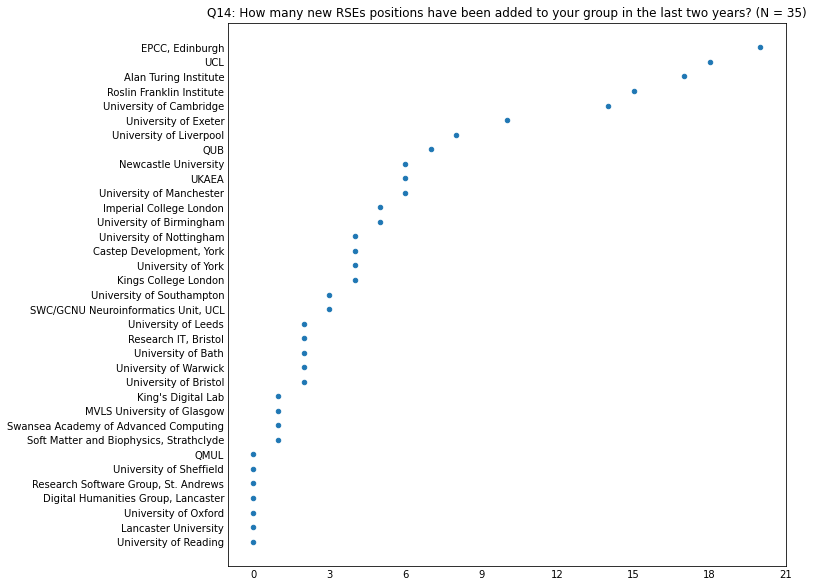

Saved processed survey responses to ../data/processed/q14_scatter.csv

Q15: Please rate the level of demand for your Group's services
Saved processed survey responses to ../data/processed/q15_stats.csv


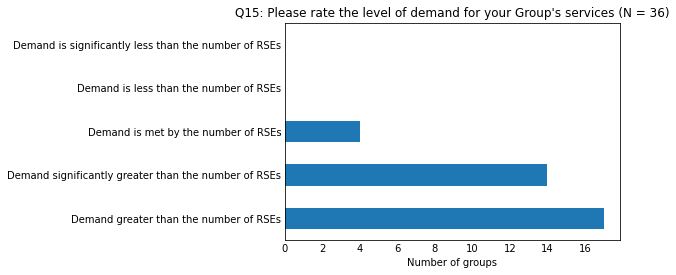


Q16: If demand for your services outstrips the number of RSEs, what causes this situation?
Saved processed survey responses to ../data/processed/q16_stats.csv


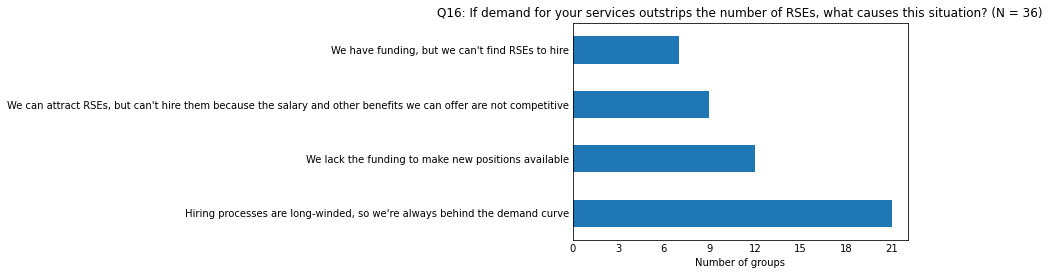

In [3]:
for qst in setup.keys():
    if qst in qsts_not_overview:
        continue
    title = vis.build_title(qst, setup)
    print(f"\n{title}")
    if setup[qst]['type'] == 'checkbox':
        dset_stats = pr.derive_checkbox_stats(dset, setup, qst)
        rw.save_dataset(dset_stats, f"{qst}_stats", verbose=verbose)
        vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} (N = {dset.shape[0]})")          
    elif setup[qst]['type'] == 'number':
        dset2plot = vis.plot_scatter(dset, setup,
                                     [col_institution, qst], title=title)
        rw.save_dataset(dset2plot, f"{qst}_scatter", verbose=verbose)       
    elif setup[qst]['type'] == 'text':
        if qst == "q5":
            dset_stats = dset[qst].value_counts().to_frame(name='count')
            print(dset_stats.to_string())
            rw.save_dataset(dset_stats, f"{qst}_count", verbose=verbose)
        else:
            dset2print = vis.print_answers(dset, setup, [col_institution, qst])
            rw.save_dataset(dset2print, f"{qst}_answers", verbose=verbose)


## Q17: Roughly what percentage of your roles are open-ended/permanent?

Q17: Roughly what percentage of your roles are open-ended/permanent?

Preprocessing prior to number conversion
- dropped empty values
- replace All with 100%
- replace values with the first number found in string
- replace 50/50 with 50%
- find the first number in the string (if any) and restrict the answer to that
- convert to numeric as integers
Saved processed survey responses to ../data/processed/q17_data.csv


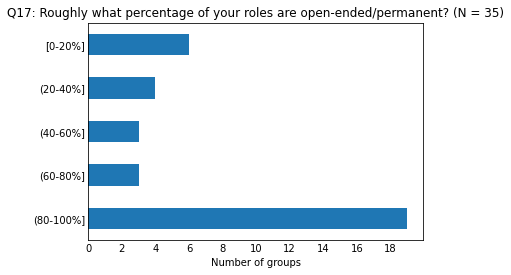

In [4]:
qst = "q17"
title = vis.build_title(qst, setup)
print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)

if verbose:
    print()
    print("Preprocessing prior to number conversion")
    print("- dropped empty values")
    print("- replace All with 100%")
    print("- replace values with the first number found in string")
    print("- replace 50/50 with 50%")
    print("- find the first number in the string (if any) and restrict the answer to that")
    print("- convert to numeric as integers")

dset2plot = dset2plot[dset2plot[qst] != ""]
dset2plot[qst] = dset2plot[qst].str.replace("All", "100%")
dset2plot[qst] = dset2plot[qst].str.replace("50/50", "50%")
dset2plot[qst] = dset2plot[qst].str.extract("(\d+)", expand=False)
dset2plot[qst] = pd.to_numeric(dset2plot[qst], errors="coerce").astype("int")

# bin the qst column in bins with specific bounds
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=["[0-20%]", "(20-40%]", "(40-60%]", "(60-80%]", "(80-100%]"],
                           include_lowest=True)

rw.save_dataset(dset2plot, f"{qst}_data", verbose=verbose)

# compute and plot stats 
dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Percentage of open-ended/permanent staff"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} (N = {dset2plot.shape[0]})")

## Q18: Does your Group have a cost recovery target? If so, what is that cost recovery target?

Q18: Does your Group have a cost recovery target? If so, what is that cost recovery target?

Preprocessing responses to
- drop the empty rows
- replace values with 0 if they start witn No
- replace values with 100 if they start witn All/Most
- find the first number in the string (if any) and restrict the answer to that
- convert to numeric as integers
Saved processed survey responses to ../data/processed/q18_data.csv


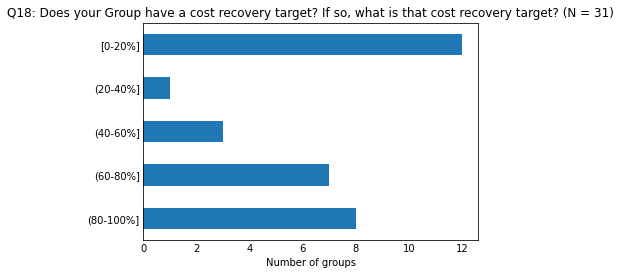

In [5]:
import importlib
importlib.reload(vis)

qst = "q18"
title = vis.build_title(qst, setup)
print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the empty rows")
    print("- replace values with 0 if they start witn No")
    print("- replace values with 100 if they start witn All/Most")
    print("- find the first number in the string (if any) and restrict the answer to that")
    print("- convert to numeric as integers")

dset2plot = dset2plot[dset2plot[qst] != ""] 
dset2plot.loc[dset2plot[qst].str.startswith("No"), qst] = "0"
dset2plot.loc[dset2plot[qst].str.startswith("All"), qst] = "100"
dset2plot.loc[dset2plot[qst].str.startswith("Most"), qst] = "100"
dset2plot[qst] = dset2plot[qst].str.extract("(\d+)", expand=False)
dset2plot[qst] = pd.to_numeric(dset2plot[qst], errors="coerce").astype("int")

# bin the qst column in bins with specific bounds
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=["[0-20%]", "(20-40%]", "(40-60%]", "(60-80%]", "(80-100%]"],
                           include_lowest=True)

rw.save_dataset(dset2plot, f"{qst}_data", verbose=verbose)

# compute and plot stats 
dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Cost recovery target"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} (N = {dset2plot.shape[0]})")

## Q19: Roughly what percentage of your group's time is spent on free at point of use activities. e.g. Training, Institutional support, free project support/consultancy.

Q19: Roughly what percentage of your group's time is spent on free at point of use activities. e.g. Training, Institutional support, free project support/consultancy.

Preprocessing responses to
- drop the empty rows
- find the first number in the string (if any) and restrict the answer to that
- convert to numeric as integers
Saved processed survey responses to ../data/processed/q19_data.csv


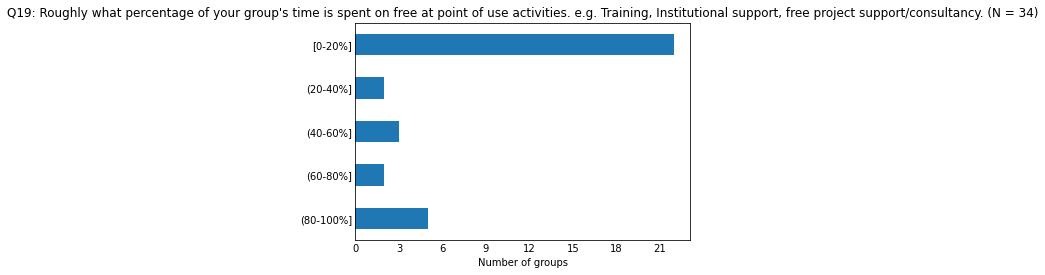

In [6]:
qst = "q19"
title = vis.build_title(qst, setup)
print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the empty rows")
    print("- find the first number in the string (if any) and restrict the answer to that")
    print("- convert to numeric as integers")

dset2plot = dset2plot[dset2plot[qst] != ""] 
dset2plot[qst] = dset2plot[qst].str.extract("(\d+)", expand=False)
dset2plot[qst] = pd.to_numeric(dset2plot[qst], errors="coerce").astype("int")

# bin the qst column in bins with specific bounds
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=["[0-20%]", "(20-40%]", "(40-60%]", "(60-80%]", "(80-100%]"],
                           include_lowest=True)

rw.save_dataset(dset2plot, f"{qst}_data", verbose=verbose)

# compute and plot stats 
dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Percentage of time spent on free activities"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} (N = {dset2plot.shape[0]})")

## Q6 In what year was your group founded?

Q6: In what year was your group founded?

Preprocessing responses to
- drop the empty rows
- keep only year >= 2012
Saved processed survey responses to ../data/processed/q6_data.csv


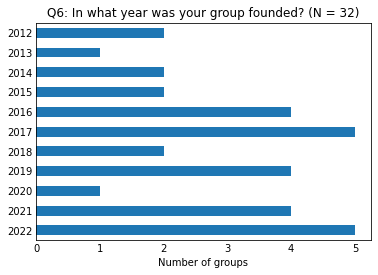

In [7]:
qst = "q6"

title = vis.build_title(qst, setup)
print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)
dset2plot = dset2plot[dset2plot[qst] >= 2012]

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the empty rows")
    print("- keep only year >= 2012")

# drop the nan rows
dset2plot = dset2plot.dropna(subset=[qst])

rw.save_dataset(dset2plot, f"{qst}_data", verbose=verbose)

dset_stats = dset2plot[qst].astype(int).value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Founding year"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} (N = {dset2plot.shape[0]})")

## Q9: How many people are currently in your group in total?

Q9: How many people are currently in your group in total?

Preprocessing responses to
- drop the empty rows
Saved processed survey responses to ../data/processed/q9_data.csv


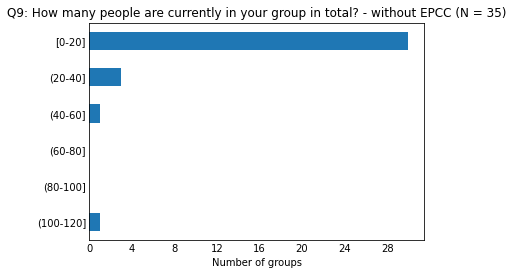

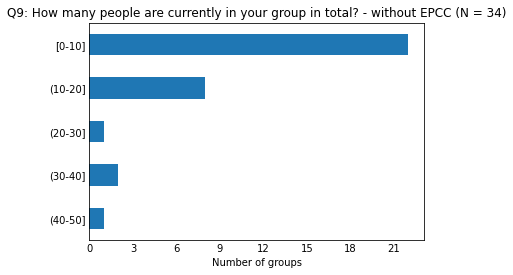

In [11]:
qst = "q9"

title = vis.build_title(qst, setup)
print(title)

dset2plot = dset[qst].copy().to_frame(name=qst)

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the empty rows")

# drop the nan rows
dset2plot = dset2plot.dropna(subset=[qst])

rw.save_dataset(dset2plot, f"{qst}_data", verbose=verbose)

# compute and plot stats - all
column = f"{qst}_binned"
dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 20, 40, 60, 80, 100, 120],
                           labels=["[0-20]", "(20-40]", "(40-60]", "(60-80]", "(80-100]" , "(100-120]"],
                           include_lowest=True)

dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Group size"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} - {subtitle} (N = {dset2plot.shape[0]})")

# compute and plot stats - without EPCC
subtitle = "without EPCC"
column = f"{qst}_binned"
dset2plot = dset2plot[dset2plot[qst] < 100]

dset2plot[column] = pd.cut(dset2plot[qst], 
                           bins=[0, 10, 20, 30, 40, 50],
                           labels=["[0-10]", "(10-20]", "(20-30]", "(30-40]", "(40-50]"],
                           include_lowest=True)

dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = "Group size"

vis.plot_hbarchart(dset_stats, stat='count', title=f"{title} - {subtitle} (N = {dset2plot.shape[0]})")

## Percentage growth in group size

How many people are currently in your group in total?
How many new RSEs positions have been added to your group in the last two years?

Preprocessing responses to
- drop the rows with nan in either column
- drop the groups with less than 5 people
Saved processed survey responses to ../data/processed/percentage_growth_data.csv


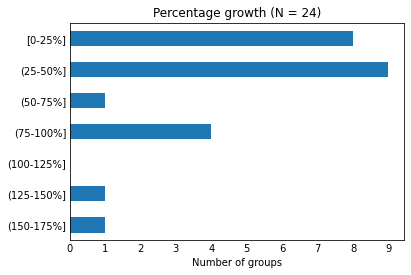

In [12]:
qst1 = "q9"
qst2 = "q14"

print(f"{setup[qst1]['text']}")  
print(f"{setup[qst2]['text']}")

# select only groups with more than min_gsize
dset2plot = dset[dset[col_ngroup] >= min_gsize].copy()
dset2plot = dset2plot[[qst1, qst2]]

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the rows with nan in either column")
    print(f"- drop the groups with less than {min_gsize} people")

dset2plot = dset2plot.dropna()
column_calculated = "Percentage growth"
# create a new column with the percentage growth in group size
dset2plot[column_calculated] = 100* dset2plot[qst2] / dset2plot[qst1] 

# bin the qst column in bins with specific bounds
column = f"{column_calculated}_binned"
# bins for data including groups with one person
# dset2plot[column] = pd.cut(dset2plot[column_calculated], 
#                            bins=[0, 50, 100, 150, 200, 250, 300, 350, 400],
#                            labels=["[0-50%]", "(50-100%]", "(100-150%]",
#                                       "(150-200%]", "(200-250%]", "(250-300%]",
#                                       "(300-350%]", "(350-400%]"],
#                            include_lowest=True)

dset2plot[column] = pd.cut(dset2plot[column_calculated], 
                           bins=[0, 25, 50, 75, 100, 125, 150, 175],
                           labels=["[0-25%]", "(25-50%]", "(50-75%]",
                                    "(75-100%]", "(100-125%]", "(125-150%]",
                                    "(150-175%]"],
                           include_lowest=True)

rw.save_dataset(dset2plot, f"{column_calculated.replace(' ', '_').lower()}_data", verbose=verbose)

# compute and plot stats 
dset_stats = dset2plot[column].value_counts().to_frame(name="Number of groups")
dset_stats = dset_stats.sort_index(ascending=False)
dset_stats.index.name = column_calculated

vis.plot_hbarchart(dset_stats, stat='count', title=f"{column_calculated} (N = {dset2plot.shape[0]})")

## People's roles

Stacked bar chart that plots how many people are in the group now (Q9) with the bar made up of 
1. how many are more junior RSEs (Q11)
2. standard RSEs (Q9 - (Q10+Q11))
3. more senior RSEs (Q10)

How many people are currently in your group in total?
How many people in your group are in a less senior role than a standard RSE (e.g. a junior RSE)?
How many people in your group are in a more senior role than a standard RSE (i.e. typically receiving greater pay than a postdoctoral researcher)?

Preprocessing responses to
- drop the rows with nan in any of these columns
- drop the groups with less than 5 people
Saved processed survey responses to ../data/processed/roles_data.csv


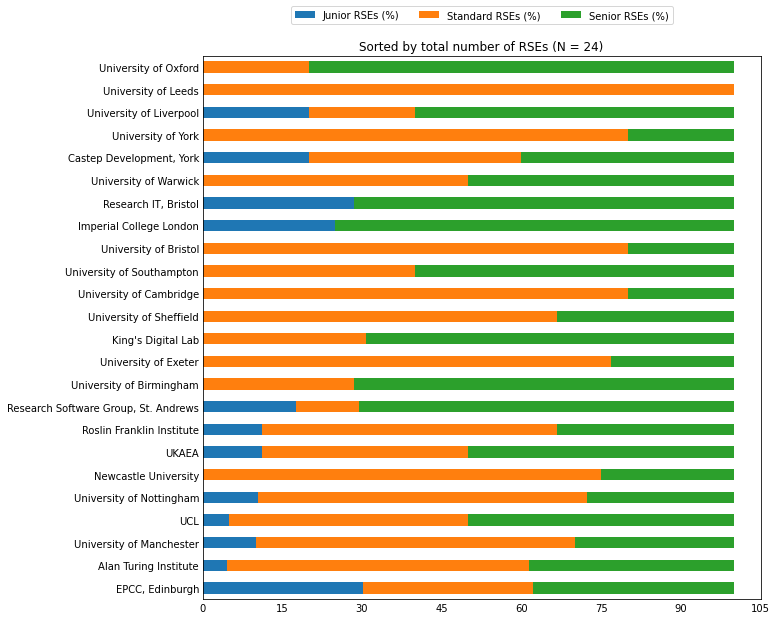

In [13]:
import importlib
importlib.reload(vis)

col_total = "q9"
col_junior = "q11"
col_senior = "q10"
col_standard = "standard"

to_rename = {col_junior: "Junior RSEs (%)",
             col_standard: "Standard RSEs (%)",
             col_senior: "Senior RSEs (%)"
             }

print(setup[col_total]["text"])
print(setup[col_junior]["text"])
print(setup[col_senior]["text"])

if verbose:
    print("\nPreprocessing responses to")
    print("- drop the rows with nan in any of these columns")
    print(f"- drop the groups with less than {min_gsize} people")

# select only groups with more than one person
dset2plot = dset[dset[col_ngroup] >= min_gsize].copy()
dset2plot = dset2plot[[col_institution, col_total, col_junior, col_senior]]
dset2plot.set_index(col_institution, inplace=True)

dset2plot = dset2plot.dropna()

# calculate the number of standard RSEs 
dset2plot[col_standard] = dset2plot[col_total] - (dset2plot[col_junior] + dset2plot[col_senior])

# calculate the percentage of RSEs
dset2plot[col_junior] = 100 * dset2plot[col_junior] / dset2plot[col_total]
dset2plot[col_standard] = 100 * dset2plot[col_standard] / dset2plot[col_total]
dset2plot[col_senior] = 100 * dset2plot[col_senior] / dset2plot[col_total]

rw.save_dataset(dset2plot, "roles_data", verbose=verbose)

# order by col_total and plot
ordering = "Sorted by total number of RSEs"
dset2plot = dset2plot.sort_values(by=col_total, ascending=False)

# # order by col_standard and plot
# ordering = "Sorted by percentage of standard RSEs"
# dset2plot = dset2plot.sort_values(by=col_standard, ascending=False)

dset2plot = dset2plot[[col_junior, col_standard, col_senior]]
dset2plot = dset2plot.rename(columns=to_rename, 
                             inplace=False)

vis.plot_hsbarchart(dset2plot, title=f"{ordering} (N = {dset2plot.shape[0]})")